## 1. Installation of Core Data Science and Geospatial Libraries

This section ensures that all necessary Python packages—including those for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), machine learning (`scikit-learn`), and geospatial analysis (`geopandas`, `folium`)—are installed in the Jupyter environment.

In [1]:
# Install essential Python libraries for data analysis, machine learning, and mapping.
# '!' at the beginning executes the command as a shell command (common in Jupyter/Colab).
!pip install pandas numpy matplotlib seaborn scikit-learn geopandas folium

# pandas: Core library for data manipulation and analysis (DataFrames).
# numpy: Fundamental package for numerical computing (arrays and mathematical functions).
# matplotlib: Comprehensive library for creating static, animated, and interactive visualizations.
# seaborn: Statistical data visualization library based on matplotlib.
# scikit-learn (sklearn): Library for machine learning (classification, regression, clustering, etc.).
# geopandas: Extends pandas to allow spatial operations on geometric types (geospatial data).
# folium: Library for visualizing geospatial data on an interactive leaflet map.

## 2. Import Libraries and Initial Data Loading

This section imports all the necessary packages installed in the previous step and reads the primary dataset, **`ev_charging_germany.csv`**, into a pandas DataFrame. It also configures display settings to ensure all columns are visible. The final line displays the first five rows to quickly inspect the data structure and content.

In [2]:
# CODE CELL 2: Import libraries, set display options, and load the dataset

# --- Library Imports ---
import pandas as pd           # Core library for data manipulation (DataFrames)
import numpy as np            # Used for numerical operations (often behind the scenes in pandas)
import matplotlib.pyplot as plt # Used for basic data visualization and plotting
import seaborn as sns         # High-level library for creating statistical graphics
import geopandas as gpd       # Extends pandas for handling geospatial data
import folium                 # Used for creating interactive, web-based maps

# --- Display Settings ---
# Set pandas option to display all columns (no truncation) when printing DataFrames.
pd.set_option("display.max_columns", None)

# --- Data Loading ---
# Load the dataset from a CSV file.
# The file "ev_charging_germany.csv" is specified.
# 'sep=";"' indicates the values are separated by semicolons, not commas.
# 'encoding="utf-8"' specifies the character encoding, which is standard for most text data.
df = pd.read_csv("ev_charging_germany.csv", sep=";", encoding="utf-8")

# --- Initial Inspection ---
# Display the first 5 rows of the DataFrame to confirm successful loading and inspect the structure.
df.head()

,ladestation_id,Betreiber,BetreiberBereinigt,BetreiberKategorie,Strasse,Hausnummer,Adresszusatz,PLZ,Ort,Bundesland,KreisKreisfreieStadt,Gemeinde,ARS,Breitengrad,Laengengrad,Inbetriebnahmedatum,NennleistungBNetzA,InstallierteLadeleistungNLL,ArtLadeeinrichtung,AnzahlLadepunkteBNetzA,AnzahlLadepunkteNLL,AbweichungAnzahlLP,LadeUseCase,Datenstand
0,1,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik,Sonstiges,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.442398,9.659075,2020-01-11,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Strassenraum,2025-10-23
1,2,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,4,4,keine Abweichung,Strassenraum,2025-10-23
2,3,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,4,4,keine Abweichung,Strassenraum,2025-10-23
3,4,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Strassenraum,2025-10-23
4,5,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik,Sonstiges,Parkplatz Campingplatz,0,NaN,72589,Westerheim,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Westerheim,84255007134,48.510500,9.609000,2019-01-07,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Kundenparkplatz,2025-10-23


## 3. Count Charging Stations Per State

This section performs a basic **descriptive statistical analysis** by counting the number of electric vehicle charging stations (`Ladepunkte`) located in each German state (`Bundesland`). The results are stored in a pandas Series, sorted in descending order to easily identify the states with the highest number of stations.

The output will show a list of German states and the corresponding count of charging stations, giving an initial insight into the spatial distribution of EV infrastructure.

In [3]:
# CODE CELL 3: Calculate the count of charging stations per state

# Calculate the frequency of each unique value in the 'Bundesland' column.
# The result is a pandas Series where the index is the state name and the values are the counts.
stations_per_state = df["Bundesland"].value_counts(
    
    # .value_counts(): Counts occurrences of unique values.
    
    # .sort_values(ascending=False): Sorts the resulting Series by the count value 
    # from largest to smallest (descending order).
).sort_values(ascending=False)

# Display the resulting Series, which shows the count of charging stations for each state.
stations_per_state


Bundesland
Bayern                    19650
Nordrhein-Westfalen       18896
Baden-Württemberg         16171
Niedersachsen              9473
Hessen                     7728
Rheinland-Pfalz            3858
Berlin                     3705
Schleswig-Holstein         3670
Sachsen                    3394
Brandenburg                2613
Hamburg                    2072
Thüringen                  1914
Sachsen-Anhalt             1615
Mecklenburg-Vorpommern     1449
Saarland                    692
Bremen                      687
Name: count, dtype: int64

## 4. Visualization of Charging Stations Distribution

This section visualizes the distribution of charging stations across Germany's states (`Bundesländer`) using a **horizontal bar plot**. This visualization is created using `matplotlib` and `seaborn` and allows for an immediate comparison of the EV infrastructure development in different regions. The state with the highest number of charging stations will appear at the top of the chart.

C:\Users\Sathwik N Sharma\AppData\Local\Temp\ipykernel_29320\1161095883.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


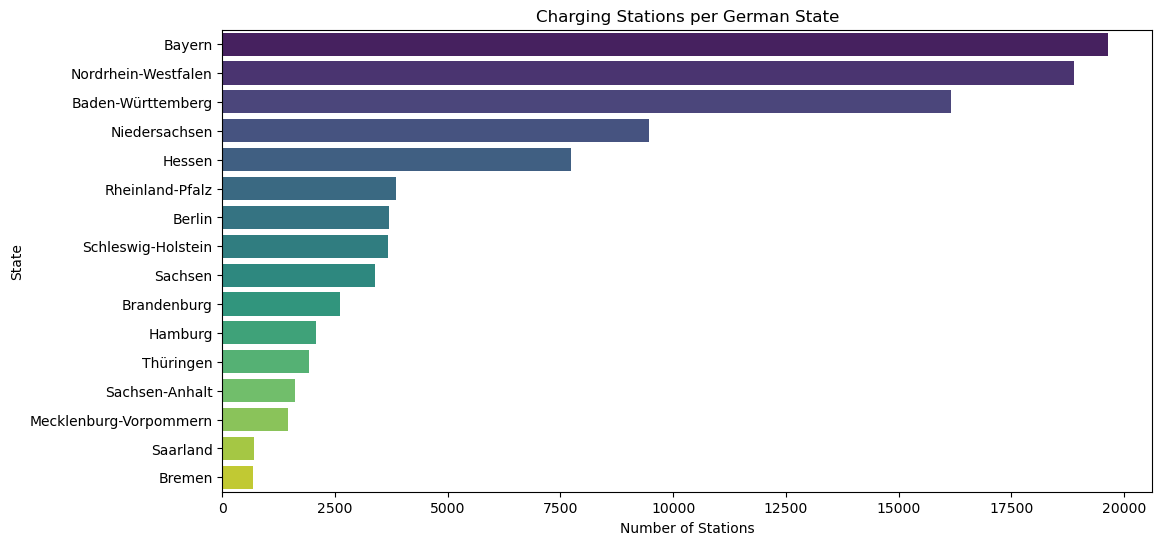

In [4]:
# CODE CELL 4: Create a horizontal bar plot of stations per state

# Set the size of the figure (the entire plot area).
# (12 inches wide, 6 inches tall) for better readability of the long state names.
plt.figure(figsize=(12, 6))

# Generate the bar plot using seaborn.
sns.barplot(
    # x-axis data: The counts (number of stations) from the 'stations_per_state' Series values.
    x=stations_per_state.values,
    
    # y-axis data: The state names (the index) from the 'stations_per_state' Series.
    y=stations_per_state.index,
    
    # palette: Specifies the color scheme for the bars. "viridis" is a common, perceptually uniform palette.
    palette="viridis"
)

# Set the main title for the plot.
plt.title("Charging Stations per German State")

# Label the x-axis (which represents the count of stations).
plt.xlabel("Number of Stations")

# Label the y-axis (which represents the state names).
plt.ylabel("State")

# Display the generated plot.
plt.show()

## 5. Data Transformation, Statistical Summary, and Geospatial Mapping (Choropleth Map)

This extensive section serves three main purposes:

1.  **Data Transformation:** The state station counts (`stations_per_state`) are converted from a pandas Series back into a DataFrame and renamed to prepare for merging with geographical data.
2.  **Statistical Summary:** The state with the maximum and minimum number of charging stations is identified and printed for a quick summary.
3.  **Geospatial Mapping:** The code fetches a GeoJSON file containing the boundaries of all German states (`Bundesländer`), merges this geographical data with the station counts, and generates a **choropleth map** , visualizing the distribution of EV charging infrastructure across the country. Darker colors on the map indicate a higher concentration of charging stations.

State with most charging stations: Bayern (19650 stations)
State with least charging stations: Bremen (687 stations)


<Figure size 1200x1400 with 0 Axes>

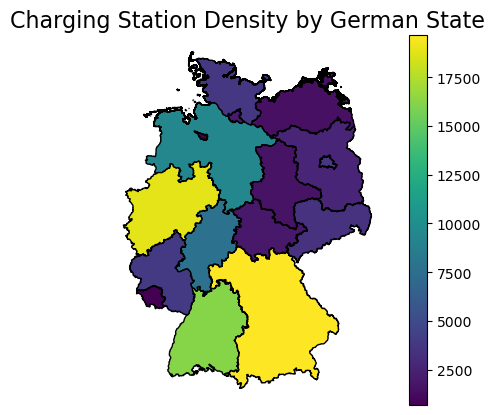

In [5]:
# CODE CELL 5: Transform data, find min/max, merge geospatial data, and create a choropleth map

# --- 1. Data Transformation ---

# Convert the 'stations_per_state' Series from the previous cell into a DataFrame.
# .rename("count"): Renames the value column (station counts) to "count".
# .reset_index(): Converts the state names (index) into a regular column.
stations_per_state = df["Bundesland"].value_counts().rename("count").reset_index()

# Rename the columns explicitly for clarity and to match the GeoJSON column name ('name').
stations_per_state.columns = ["name", "count"]

# --- 2. Statistical Summary ---

# Find the state with the maximum count. Since the DataFrame is sorted (from value_counts()), 
# the state with the highest count is the first row (iloc[0]).
max_state = stations_per_state.iloc[0]

# Find the state with the minimum count (last row, iloc[-1]).
min_state = stations_per_state.iloc[-1]

# Print the results of the statistical summary.
# int() is used to display the count as a whole number.
print(f"State with most charging stations: {max_state['name']} ({int(max_state['count'])} stations)")
print(f"State with least charging stations: {min_state['name']} ({int(min_state['count'])} stations)")


# --- 3. Geospatial Data Acquisition and Map Generation ---

# Define the URL for the GeoJSON file containing the geographical boundaries of German states.
geojson_url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/master/2_bundeslaender/1_sehr_hoch.geo.json"

# Load the GeoJSON file directly into a GeoPandas GeoDataFrame.
bundeslaender = gpd.read_file(geojson_url)

# Merge the geographical boundaries (bundeslaender) with the station count data (stations_per_state).
# 'on="name"' specifies the column used for matching rows (state name).
# 'how="left"' ensures all German states are kept, even if they had zero stations in the dataset.
merged = bundeslaender.merge(stations_per_state, on="name", how="left")

# Replace any missing count values (NaN) with 0. 
# This handles states that may not have appeared in the dataset but exist in the map data.
merged["count"] = merged["count"].fillna(0)  # filling in missing states with 0 value

# Set the figure size for the map plot.
plt.figure(figsize=(12, 14))

# Create the choropleth map using GeoPandas' plot function.
ax = merged.plot(
    column="count",     # The data column used to determine the color intensity.
    cmap="viridis",     # The color map (scheme) to use; 'viridis' goes from yellow (low) to deep purple (high).
    legend=True,        # Display the color bar legend.
    edgecolor="black"   # Draw a black border around each state boundary.
)

# Set the title of the map.
plt.title("Charging Station Density by German State", fontsize=16)

# Hide the axis ticks and labels, as they are not meaningful for a geographical map.
plt.axis("off")

# Display the map visualization.
plt.show()

## 6. Focused City Analysis and Interactive Map for Amberg

This section performs a two-part analysis:

1.  **Excluding Major Hubs:** It filters the dataset to **exclude Germany's four largest cities** (Berlin, Hamburg, Munich/München, and Cologne/Köln). This helps identify medium-sized or smaller cities that are leading in EV infrastructure development outside of the expected major metropolitan areas.
2.  **Amberg-Specific Analysis:** It performs a detailed breakdown of charging stations in the city of **Amberg** (your inferred current location), calculating the total number of stations and the total maximum installed charging power.
3.  **Interactive Map:** Finally, it generates an interactive **Folium map** centered on Amberg, placing a marker for every charging station in the city, complete with a popup displaying the operator and charging power.

In [6]:
# CODE CELL 6: Filtered city analysis and Folium map for Amberg

# --- 1. Filtered City Analysis (Excluding Major Hubs) ---

# Define a list of major cities to be excluded from the analysis.
excluded_cities = ["Berlin", "Hamburg", "München", "Munich", "Köln", "Cologne"]

# Create a filtered DataFrame: 
# The '~' (tilde) negates the boolean result, selecting rows where the city is NOT in the excluded_cities list.
# .isin() checks if a value is present in the list.
filtered_df = df[~df["Ort"].isin(excluded_cities)]

# Count the frequency of each city in the filtered DataFrame.
city_counts = filtered_df["Ort"].value_counts().reset_index()

# Rename the columns for clarity: 'city' and 'station_count'.
city_counts.columns = ["city", "station_count"]

# Identify the city with the most stations in the filtered dataset (the first row, as it's value_counts() sorted).
top_city = city_counts.iloc[0]

# Print the result.
print(f"City with most charging stations (excluding Berlin, Hamburg, Munich, Cologne): {top_city['city']} ({top_city['station_count']} stations)")


# --- 2. Amberg-Specific Analysis ---

# Create a DataFrame containing only data for the city of Amberg.
amberg_df = df[df["Ort"] == "Amberg"]

# Calculate the total number of charging stations in Amberg.
amberg_station_count = len(amberg_df)

# Calculate the total maximum installed charging power (in kW) for all stations in Amberg.
amberg_max_power = amberg_df["InstallierteLadeleistungNLL"].sum()

# Print the Amberg summary statistics.
print(f"\nAmberg total stations: {amberg_station_count}")
print(f"Amberg total maximum charging power (kW): {amberg_max_power}")


# --- 3. Interactive Folium Map for Amberg ---

# Initialize a Folium map centered near Amberg using its approximate coordinates.
# [49.4478, 11.8583] are the approximate latitude and longitude for Amberg.
amberg_map = folium.Map(location=[49.4478, 11.8583], zoom_start=13)

# Iterate through each charging station in the Amberg DataFrame.
for _, row in amberg_df.iterrows():
    # Add a circular marker for each station.
    folium.CircleMarker(
        # Location is defined by the Latitude and Longitude columns.
        location=[row["Breitengrad"], row["Laengengrad"]],
        radius=5,  # Set the size of the marker.
        # Set the text that appears when the marker is clicked (popup): Operator and Power.
        popup=f"{row['Betreiber']} ({row['InstallierteLadeleistungNLL']} kW)",
        color="blue",  # Marker border color.
        fill=True      # Fill the circle.
    ).add_to(amberg_map)

# Display the interactive map in the Jupyter output.
amberg_map

City with most charging stations (excluding Berlin, Hamburg, Munich, Cologne): Stuttgart (2116 stations)

Amberg total stations: 34
Amberg total maximum charging power (kW): 2576.0


## 7. Analysis of Leading Charging Station Operators

This final analysis section focuses on the operators that contribute the most to Germany's charging infrastructure. It calculates the **total number of charging points** (`AnzahlLadepunkteNLL`) controlled by each **operator** (`Betreiber`) across the entire dataset.

The code:
1.  **Groups** the data by operator.
2.  **Sums** the total number of charging points for each.
3.  **Sorts** the results and selects the **Top 5**.
4.  **Prints** a clear, numbered list of the top operators and their total capacity.
5.  **Visualizes** this capacity using a horizontal bar plot for easy comparison.

Top 5 Charging Station Operators in Germany:
1. EnBW mobility+ AG und Co.KG: 9797 vehicles can be charged at once
2. E.ON Drive GmbH: 4080 vehicles can be charged at once
3. Tesla Germany GmbH: 3624 vehicles can be charged at once
4. EWE Go GmbH: 2905 vehicles can be charged at once
5. Mercedes-Benz AG: 2665 vehicles can be charged at once


C:\Users\Sathwik N Sharma\AppData\Local\Temp\ipykernel_29320\165891953.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


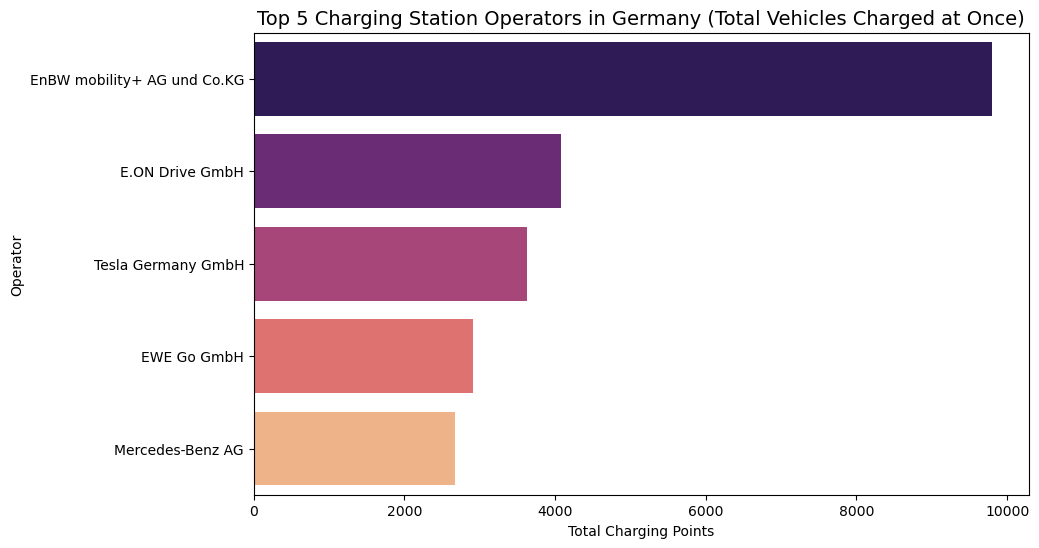

In [7]:
# CODE CELL 7: Identify and visualize the Top 5 Charging Station Operators

# Group the DataFrame by the 'Betreiber' (Operator) column.
top_operators = (
    df.groupby("Betreiber")["AnzahlLadepunkteNLL"]
    
    # Sum the 'AnzahlLadepunkteNLL' (Number of charging points available at once) for each operator.
    .sum()
    
    # Sort the sums in descending order to find the largest operators.
    .sort_values(ascending=False)
    
    # Select only the top 5 operators.
    .head(5)
)

# --- Output Summary ---
print("Top 5 Charging Station Operators in Germany:")

# Iterate through the top_operators Series (index=operator, value=points).
for i, (operator, points) in enumerate(top_operators.items(), 1):
    # Print the ranked list with the total charging points available at once (capacity).
    print(f"{i}. {operator}: {points} vehicles can be charged at once")

# --- Visualization ---

# Set the figure size for the plot.
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using seaborn.
sns.barplot(
    x=top_operators.values,  # The total charging points (x-axis).
    y=top_operators.index,   # The operator names (y-axis).
    palette="magma"          # A red/purple color palette for visualization.
)

# Set the title and axis labels.
plt.title("Top 5 Charging Station Operators in Germany (Total Vehicles Charged at Once)", fontsize=14)
plt.xlabel("Total Charging Points")
plt.ylabel("Operator")

# Display the plot.
plt.show()